# Homicide Data Analysis

*The data used here is not the best*

### Importing our libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading our data 

In [2]:
data = 'homicide_by_countries.csv'
df = pd.read_csv(data)

In [3]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [4]:
df.shape

(195, 6)

In [5]:
df.isna().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

There are no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


### Top 5 countries with the highest homicide numbers

In [7]:
df1 = df[['Location', 'Count']].sort_values(by='Count', ascending=False).head()
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


Text(0.5, 1.0, 'Top 5 Countries with the highest homicide numbers')

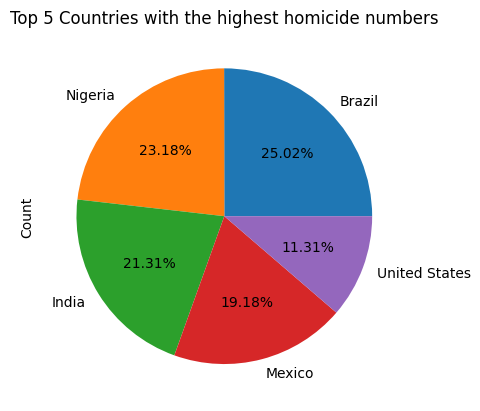

In [8]:
df1.plot(x='Location',
         y='Count',
         kind='pie',
         labels=df1.Location, 
         autopct="%1.2f%%")
plt.legend().set_visible(False)
plt.title('Top 5 Countries with the highest homicide numbers')

### Top 5 Countries with the highest homicide rates

In [9]:
arr1 = df.groupby('Location')['Rate'].sum().sort_values(ascending=False).head(5)
arr1

Location
U.S. Virgin Islands    49.3
Jamaica                44.7
Lesotho                43.6
Trinidad and Tobago    38.6
El Salvador            37.2
Name: Rate, dtype: float64

Text(0.5, 1.0, 'Countries with the highest homicide rates')

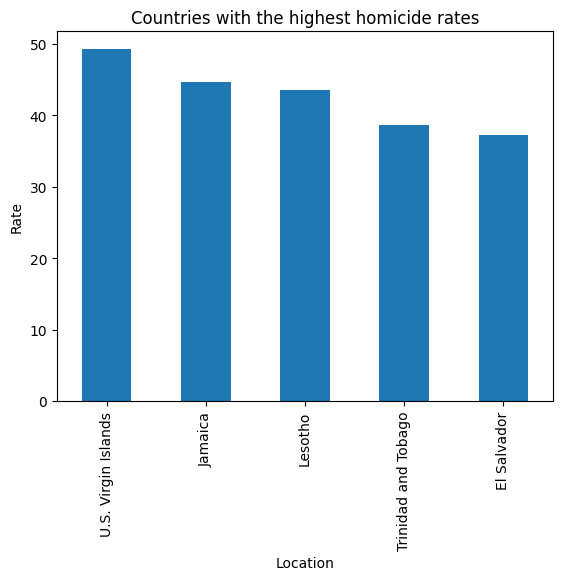

In [10]:
arr1.plot(kind='bar')
plt.ylabel('Rate')
plt.title('Countries with the highest homicide rates')

### Homicide numbers by Region

<Axes: title={'center': 'Homicide numbers by Region'}, ylabel='Count'>

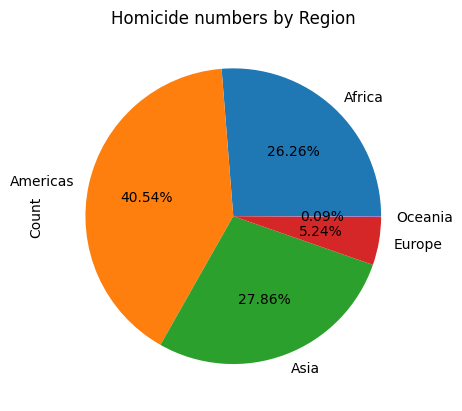

In [11]:
df.groupby(by='Region')['Count'].sum().plot(kind='pie', autopct='%1.2f%%', 
                                            title='Homicide numbers by Region')

### Homicide numbers by Subregion

In [12]:
df2 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df2.head()

Subregion
South America         78872
Southern Asia         58631
Central America       47371
Western Africa        46318
South-Eastern Asia    25314
Name: Count, dtype: int64

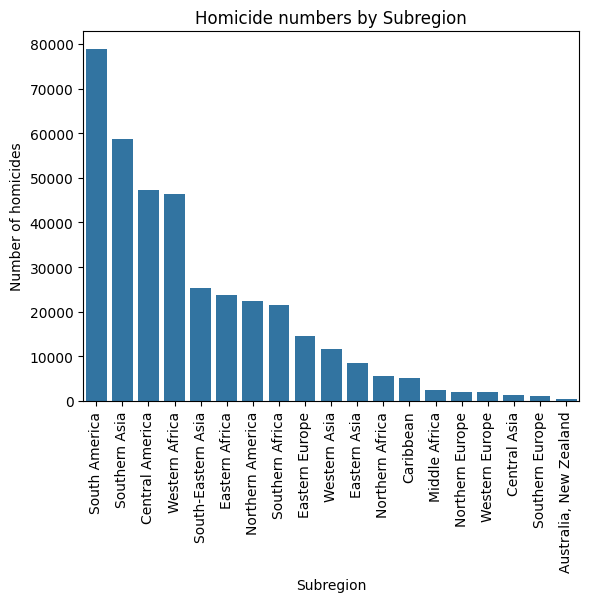

In [13]:
sns.barplot(x=df2.index, y=df2.values)
plt.xticks(rotation=90)
plt.ylabel('Number of homicides')
plt.title('Homicide numbers by Subregion')
xlabel = None

### Homicide numbers in Africa

Text(0.5, 1.0, 'Top 10 African Countries with the highest homicide numbers')

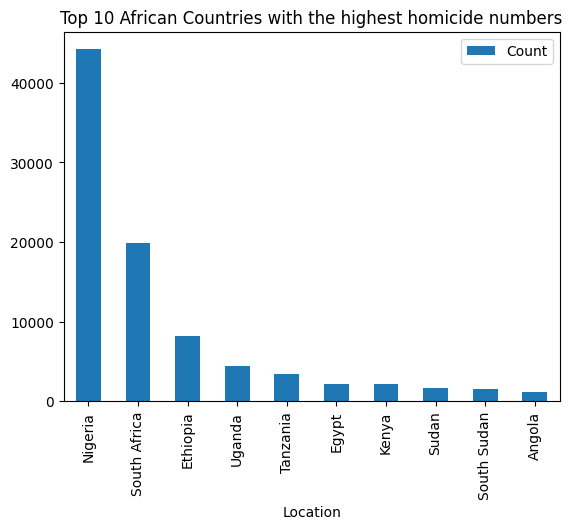

In [14]:
df[df['Region'] == 'Africa'].sort_values('Count', ascending=False).head(10).plot(kind='bar', x='Location', y='Count')
plt.title('Top 10 African Countries with the highest homicide numbers')

### Homicide trend by Region

In [15]:
df3 = df.groupby(['Region', 'Year'])['Count'].sum()
df3 = df3.unstack(level=0)
df3

Region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2006,NaN,2.0,203.0,NaN,NaN
2007,NaN,26.0,NaN,NaN,NaN
2008,1702.0,NaN,NaN,NaN,NaN
2009,27.0,42.0,NaN,NaN,NaN
2010,303.0,NaN,NaN,1.0,NaN
2011,855.0,NaN,1626.0,0.0,NaN
2012,15264.0,53.0,61.0,NaN,NaN
2013,NaN,NaN,5782.0,NaN,NaN
2014,NaN,13.0,3029.0,NaN,NaN


In [16]:
# Replacing the missing values by the average homicide count of the 
# particular region
for column in df3.columns:
    df3[column] = df3[column].fillna(df3[column].mean())

In [17]:
df3

Region,Africa,Americas,Asia,Europe,Oceania
Year,,,,,
2006,9948.1,2.000000,203.0,2483.625,173.5
2007,9948.1,26.000000,8796.0,2483.625,173.5
2008,1702.0,17066.333333,8796.0,2483.625,173.5
2009,27.0,42.000000,8796.0,2483.625,173.5
2010,303.0,17066.333333,8796.0,1.000,173.5
2011,855.0,17066.333333,1626.0,0.000,173.5
2012,15264.0,53.000000,61.0,2483.625,173.5
2013,9948.1,17066.333333,5782.0,2483.625,173.5
2014,9948.1,13.000000,3029.0,2483.625,173.5


Text(0, 0.5, 'Number of homicides')

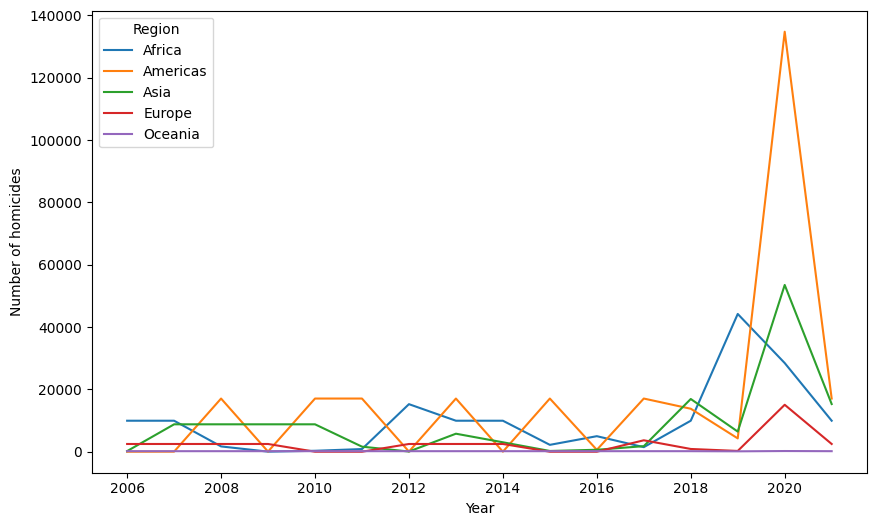

In [18]:
df3.plot(kind='line', figsize=(10,6))
plt.ylabel('Number of homicides')